In [47]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [48]:
immo_dataset = pd.read_csv('fulldata.csv')

immo_dataset.head()


,locality,postal_code,region,property_type,subtype_property,price,contruction_year,type_of_sale,number_of_rooms,living_area,...,has_open_fire,has_terrace,terrace_area,has_garden,garden_surface,habitable_surface,plot_land_surface,number_of_facades,has_swimming_pool,building_state
0,Deinze,9800,Flanders,APARTMENT,APARTMENT,395000.0,2023.0,residential_sale,2,22.0,...,0,1,12.0,1,NaN,99.0,NaN,4.0,0,AS_NEW
1,Halle,1500,Flanders,HOUSE,HOUSE,385000.0,NaN,residential_sale,3,NaN,...,0,0,NaN,0,NaN,158.0,NaN,NaN,0,NaN
2,Antwerp,2060,Flanders,APARTMENT,APARTMENT,140000.0,NaN,residential_sale,1,NaN,...,0,1,8.0,0,NaN,44.0,NaN,NaN,0,NaN
3,Antwerp,2018,Flanders,APARTMENT,APARTMENT,215000.0,NaN,residential_sale,2,NaN,...,0,0,NaN,0,NaN,75.0,NaN,NaN,0,NaN
4,Edegem,2650,Flanders,APARTMENT,APARTMENT,349900.0,NaN,residential_sale,2,NaN,...,0,1,NaN,0,NaN,103.0,NaN,NaN,0,NaN


In [49]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11243 entries, 0 to 11242
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   locality               11243 non-null  object 
 1   postal_code            11243 non-null  object 
 2   region                 11171 non-null  object 
 3   property_type          11243 non-null  object 
 4   subtype_property       11243 non-null  object 
 5   price                  11242 non-null  float64
 6   contruction_year       2406 non-null   float64
 7   type_of_sale           11243 non-null  object 
 8   number_of_rooms        11243 non-null  int64  
 9   living_area            3438 non-null   float64
 10  kitchen_fully_equiped  3438 non-null   float64
 11  is_furnished           11243 non-null  int64  
 12  has_open_fire          11243 non-null  int64  
 13  has_terrace            11243 non-null  int64  
 14  terrace_area           4678 non-null   float64
 15  ha

Data Cleaning


Remove spaces from columns with objects (strings).

In [50]:

immo_dataset = immo_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


Replace spaces inside postal codes.

In [51]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace(' ', '')

Remove letters from postal codes.

In [52]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace(r'\D', '')

Remove erronous postal codes not belonging to Belgium (with more than 4 digits).

In [53]:
res = immo_dataset[immo_dataset['postal_code'].map(lambda x: len(x) >= 5)]
immo_dataset.drop(res.index, inplace=True)
print(immo_dataset['postal_code'].unique())


['9800' '1500' '2060' '2018' '2650' '3128' '3390' '9470' '8300' '1080'
 '1830' '3910' '6637' '1170' '2100' '1370' '2940' '2610' '1050' '9050'
 '8800' '9100' '9870' '1800' '2860' '2580' '9991' '9000' '8587' '8434'
 '8810' '8770' '3630' '7900' '3221' '3730' '3800' '2280' '7912' '1020'
 '2560' '2243' '9290' '1760' '2440' '8000' '4367' '9600' '4000' '4041'
 '1440' '2830' '1200' '1030' '1070' '4100' '4690' '4020' '8370' '3680'
 '9070' '3070' '8860' '2450' '8301' '2660' '3830' '3500' '3840' '3720'
 '4820' '6940' '1653' '4430' '2620' '4500' '9770' '4102' '6792' '9750'
 '1040' '1410' '1820' '9120' '8630' '9472' '3000' '9820' '3010' '1180'
 '1000' '2170' '2850' '2340' '1790' '8740' '7190' '8500' '1495' '6030'
 '3990' '3150' '9968' '1300' '1140' '5100' '2970' '7620' '9160' '9032'
 '9900' '9300' '9660' '1210' '1060' '8690' '1755' '8647' '3020' '1700'
 '4340' '1090' '1480' '8930' '6042' '9260' '7940' '8660' '1420' '1740'
 '2000' '1780' '4040' '1083' '2570' '2380' '4680' '1160' '5030' '6750'
 '1150

Create subset for municipalities.

In [54]:
municipalities = immo_dataset[['locality', 'postal_code']]

Find empty values

In [55]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

locality                  0.000000
postal_code               0.000000
region                    0.125168
property_type             0.000000
subtype_property          0.000000
price                     0.008941
contruction_year         78.497988
type_of_sale              0.000000
number_of_rooms           0.000000
living_area              69.271346
kitchen_fully_equiped    69.271346
is_furnished              0.000000
has_open_fire             0.000000
has_terrace               0.000000
terrace_area             58.202950
has_garden                0.000000
garden_surface           77.916853
habitable_surface         5.400089
plot_land_surface        75.556549
number_of_facades        73.848905
has_swimming_pool         0.000000
building_state           72.910148
dtype: float64


Compare property_type and subtype_property values.

In [56]:
print(immo_dataset['property_type'].unique())
print(immo_dataset['subtype_property'].unique())

['APARTMENT' 'HOUSE']
['APARTMENT' 'HOUSE']


Drop columns from dataset due to hight percentage of missing values. 

subtype_property is dropped because it has the same values as property_type.

In [57]:
drop_columns = ['locality', 'contruction_year', 'subtype_property', 'living_area', 
                'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 
                'plot_land_surface', 'number_of_facades', 'building_state']
immo_dataset.drop(drop_columns , axis=1, inplace=True)
immo_dataset.head()
immo_dataset.shape



(11185, 12)

Drop rows with empty values.

In [58]:
immo_dataset.info()
immo_dataset.dropna(inplace=True)
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11185 entries, 0 to 11242
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        11185 non-null  object 
 1   region             11171 non-null  object 
 2   property_type      11185 non-null  object 
 3   price              11184 non-null  float64
 4   type_of_sale       11185 non-null  object 
 5   number_of_rooms    11185 non-null  int64  
 6   is_furnished       11185 non-null  int64  
 7   has_open_fire      11185 non-null  int64  
 8   has_terrace        11185 non-null  int64  
 9   has_garden         11185 non-null  int64  
 10  habitable_surface  10581 non-null  float64
 11  has_swimming_pool  11185 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 10570 entries, 0 to 11242
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  -----

Define duplicates.

In [59]:
duplicate_rows = immo_dataset.duplicated()
duplicate_data = immo_dataset[duplicate_rows]
duplicate_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 191 to 11212
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        285 non-null    object 
 1   region             285 non-null    object 
 2   property_type      285 non-null    object 
 3   price              285 non-null    float64
 4   type_of_sale       285 non-null    object 
 5   number_of_rooms    285 non-null    int64  
 6   is_furnished       285 non-null    int64  
 7   has_open_fire      285 non-null    int64  
 8   has_terrace        285 non-null    int64  
 9   has_garden         285 non-null    int64  
 10  habitable_surface  285 non-null    float64
 11  has_swimming_pool  285 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 28.9+ KB


Remove duplicates.

In [60]:
immo_dataset.drop_duplicates(inplace=True)


In [61]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10285 entries, 0 to 11242
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        10285 non-null  object 
 1   region             10285 non-null  object 
 2   property_type      10285 non-null  object 
 3   price              10285 non-null  float64
 4   type_of_sale       10285 non-null  object 
 5   number_of_rooms    10285 non-null  int64  
 6   is_furnished       10285 non-null  int64  
 7   has_open_fire      10285 non-null  int64  
 8   has_terrace        10285 non-null  int64  
 9   has_garden         10285 non-null  int64  
 10  habitable_surface  10285 non-null  float64
 11  has_swimming_pool  10285 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


Data Analysis

In [62]:
immo_dataset.shape

(10285, 12)

In [63]:
immo_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10285 entries, 0 to 11242
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        10285 non-null  object 
 1   region             10285 non-null  object 
 2   property_type      10285 non-null  object 
 3   price              10285 non-null  float64
 4   type_of_sale       10285 non-null  object 
 5   number_of_rooms    10285 non-null  int64  
 6   is_furnished       10285 non-null  int64  
 7   has_open_fire      10285 non-null  int64  
 8   has_terrace        10285 non-null  int64  
 9   has_garden         10285 non-null  int64  
 10  habitable_surface  10285 non-null  float64
 11  has_swimming_pool  10285 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


Percentage of empty values (this is before the cleaning process).

In [64]:
print(missing_percentage)

locality                  0.000000
postal_code               0.000000
region                    0.125168
property_type             0.000000
subtype_property          0.000000
price                     0.008941
contruction_year         78.497988
type_of_sale              0.000000
number_of_rooms           0.000000
living_area              69.271346
kitchen_fully_equiped    69.271346
is_furnished              0.000000
has_open_fire             0.000000
has_terrace               0.000000
terrace_area             58.202950
has_garden                0.000000
garden_surface           77.916853
habitable_surface         5.400089
plot_land_surface        75.556549
number_of_facades        73.848905
has_swimming_pool         0.000000
building_state           72.910148
dtype: float64



Find correlation between price and other variables

In [65]:
# Define categorical columns.
categorical_columns = ['region', 'property_type', 'type_of_sale']

# Convert categorical columns to numerical 
encoded_data = pd.get_dummies(immo_dataset, columns= categorical_columns)

# Calculate correlation coefficients
correlation_coefficient = encoded_data.corr()[['price']]

# Print the correlation coefficients

print(correlation_coefficient.sort_values(by=['price'], ascending=False))

                                                  price
price                                          1.000000
habitable_surface                              0.551419
number_of_rooms                                0.365836
has_swimming_pool                              0.220126
region_Brussels                                0.184246
has_terrace                                    0.106388
has_garden                                     0.067175
property_type_HOUSE                            0.053431
type_of_sale_residential_sale                  0.042368
region_Flanders                                0.040559
is_furnished                                   0.011005
type_of_sale_annuity_lump_sum                 -0.008064
type_of_sale_first_session_with_reserve_price -0.010499
has_open_fire                                 -0.039626
type_of_sale_annuity_monthly_amount           -0.040934
property_type_APARTMENT                       -0.053431
postal_code                                   -0

Remove 'type_of_sale' column .

In [66]:
#drop_columns_type = ['type_of_sale']
immo_dataset = immo_dataset.drop(['type_of_sale'], axis=1)
immo_dataset.head(10)

,postal_code,region,property_type,price,number_of_rooms,is_furnished,has_open_fire,has_terrace,has_garden,habitable_surface,has_swimming_pool
0,9800,Flanders,APARTMENT,395000.0,2,0,0,1,1,99.0,0
1,1500,Flanders,HOUSE,385000.0,3,0,0,0,0,158.0,0
2,2060,Flanders,APARTMENT,140000.0,1,0,0,1,0,44.0,0
3,2018,Flanders,APARTMENT,215000.0,2,0,0,0,0,75.0,0
4,2650,Flanders,APARTMENT,349900.0,2,0,0,1,0,103.0,0
5,3128,Flanders,HOUSE,380000.0,4,0,0,1,0,220.0,0
6,3390,Flanders,HOUSE,510000.0,5,0,0,1,0,224.0,0
7,9470,Flanders,HOUSE,339000.0,3,0,0,1,0,165.0,0
8,8300,Flanders,APARTMENT,765000.0,2,1,0,1,0,96.0,0
9,1080,Brussels,APARTMENT,339000.0,3,0,1,0,0,140.0,0


Plot correlation between price and other variables.

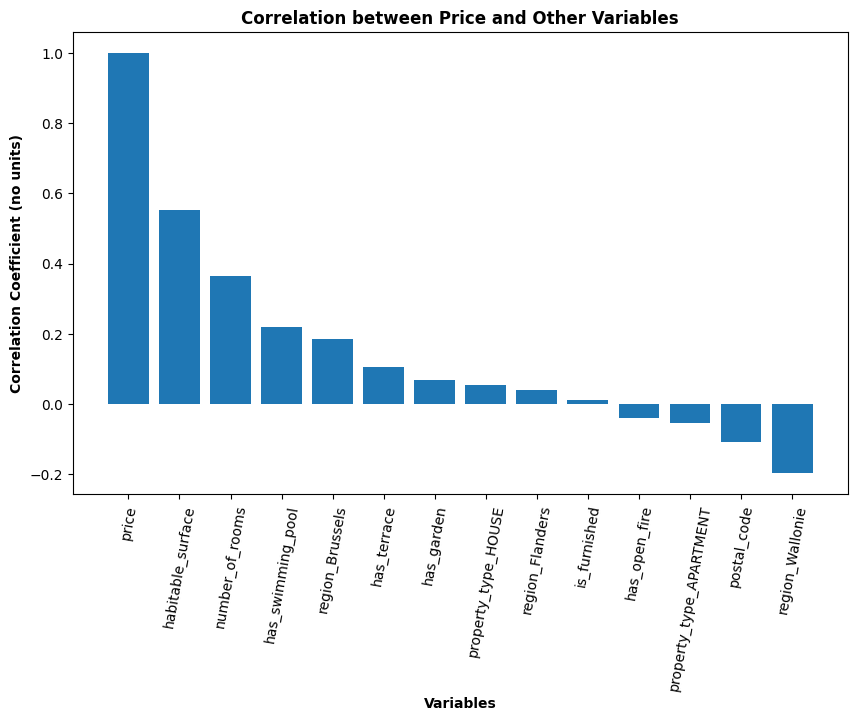

In [67]:
# Define categorical columns.
categorical_columns = ['region', 'property_type']

# Convert the categorical columns to numerical
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

# Calculate the correlation using the Pearson method
pearson_corr = encoded_data.corr(method='pearson')

# Sort the correlation values in descending order
sorted_correlation = pearson_corr.sort_values(by='price',ascending=False)

# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_correlation.index, sorted_correlation['price'])
plt.xlabel('Variables', fontweight='bold')
plt.ylabel('Correlation Coefficient (no units)', fontweight='bold')
plt.title('Correlation between Price and Other Variables', fontweight='bold')
plt.xticks(rotation=80)
plt.show()


Define categorical columns and convert them to numerical.

In [69]:
categorical_columns = ['region', 'property_type']
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

Plot Correlation Heatmap.

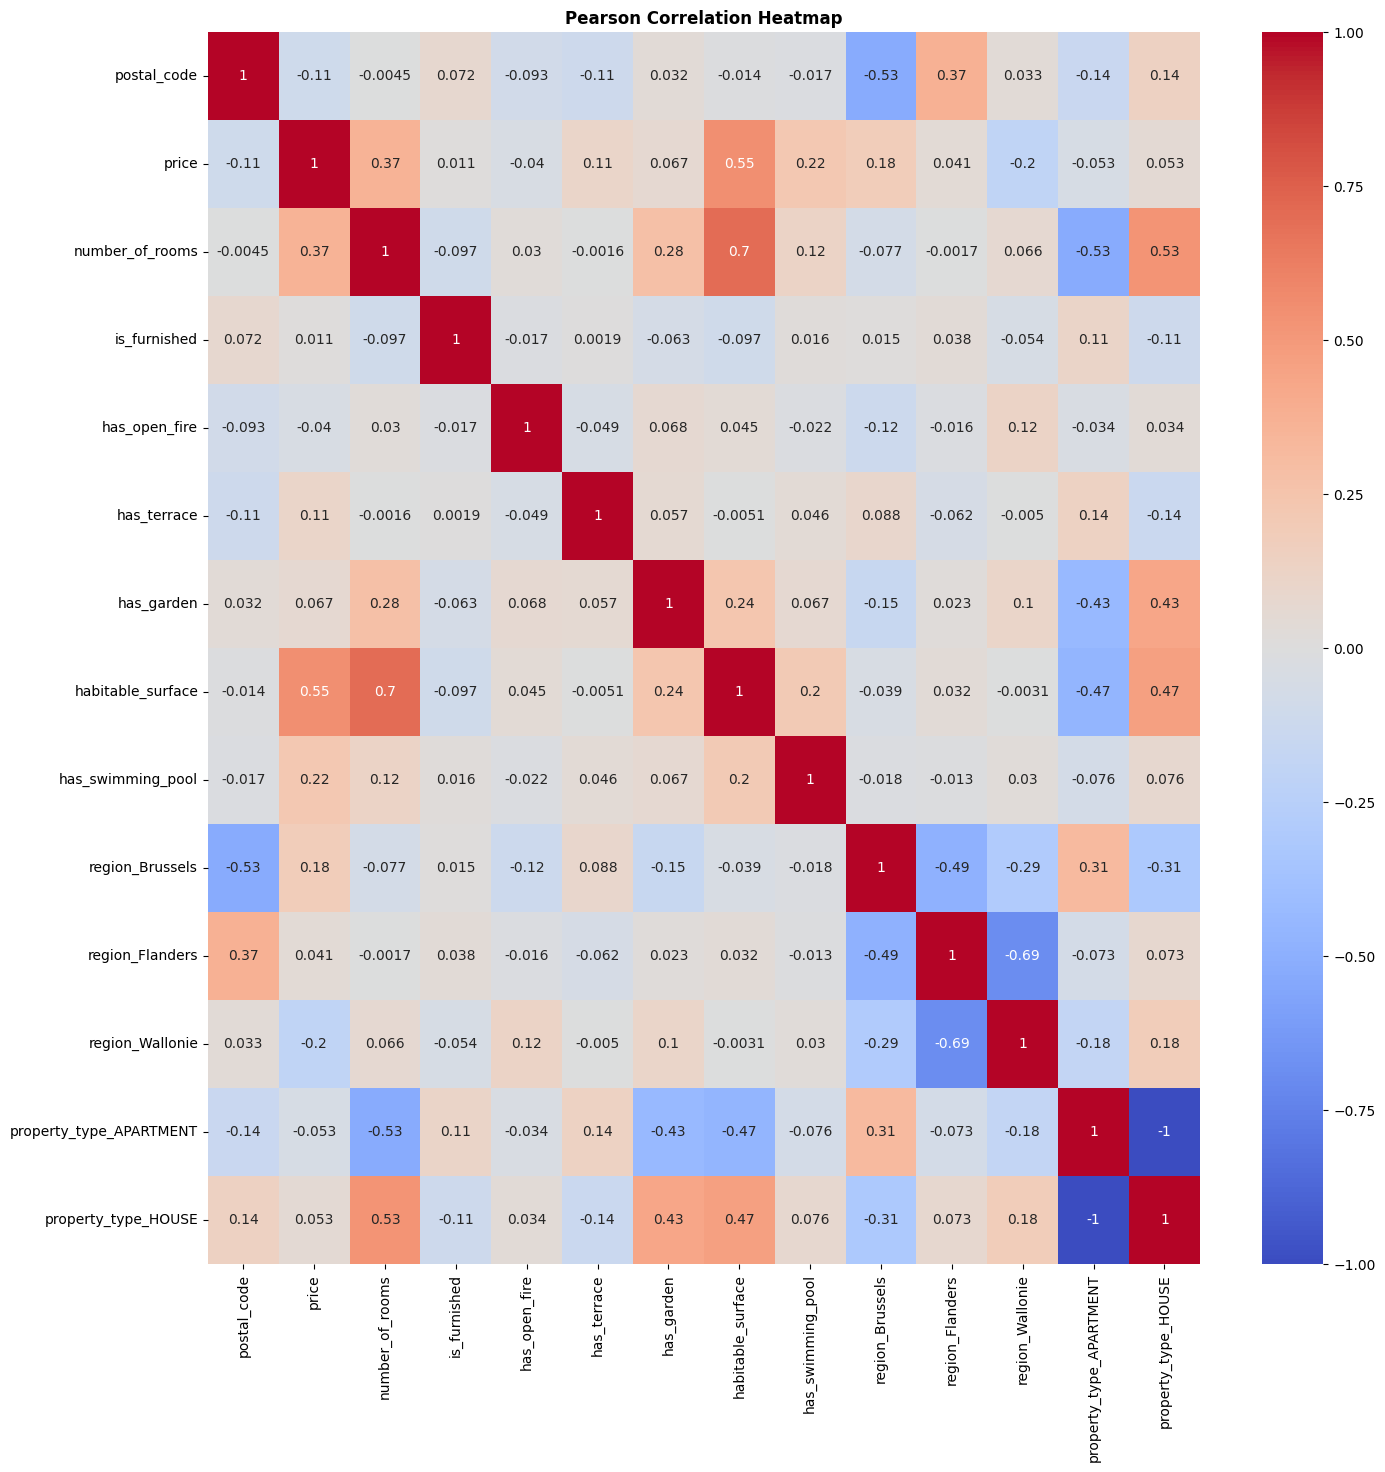

In [68]:
# Calculate the correlation using Pearson method
pearson_corr = encoded_data.corr(method='pearson')

# Plotting the correlation heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap', fontweight='bold')
plt.show()

How are variables correlated to each other? 

There is a positive correlation between number of rooms and habitable surface.

Also positive correlation between number of rooms and type of property:house.

Positive correaltion between price and habitable surface.

Calculate correlation of all variables between them.

In [71]:
# Calculate correlation coefficient.
correlation_coefficient = encoded_data.corr()

# Print the correlation coefficients
print(correlation_coefficient)

                         postal_code     price  number_of_rooms  is_furnished   
postal_code                 1.000000 -0.108634        -0.004490      0.072368  \
price                      -0.108634  1.000000         0.365836      0.011005   
number_of_rooms            -0.004490  0.365836         1.000000     -0.097165   
is_furnished                0.072368  0.011005        -0.097165      1.000000   
has_open_fire              -0.092750 -0.039626         0.030037     -0.017295   
has_terrace                -0.112034  0.106388        -0.001598      0.001872   
has_garden                  0.031857  0.067175         0.280967     -0.063233   
habitable_surface          -0.013553  0.551419         0.695527     -0.096759   
has_swimming_pool          -0.016567  0.220126         0.117795      0.016253   
region_Brussels            -0.530049  0.184246        -0.076993      0.014721   
region_Flanders             0.369610  0.040559        -0.001750      0.038315   
region_Wallonie             

Which variables have the greatest influence on the price?

The variables with the most influence on property price are:

Habitable surface

Number of rooms

Presence of swimming pool

Region: Brussels

Presence of terrace.



Which variables have the least influence on the price?

The variables with the least influence on price are:

Region:Flanders

If it is furnished

If it has open fire

How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

We have three quantitative and eight qualitative variables.

In [72]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10285 entries, 0 to 11242
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        10285 non-null  object 
 1   region             10285 non-null  object 
 2   property_type      10285 non-null  object 
 3   price              10285 non-null  float64
 4   number_of_rooms    10285 non-null  int64  
 5   is_furnished       10285 non-null  int64  
 6   has_open_fire      10285 non-null  int64  
 7   has_terrace        10285 non-null  int64  
 8   has_garden         10285 non-null  int64  
 9   habitable_surface  10285 non-null  float64
 10  has_swimming_pool  10285 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 964.2+ KB


Step 3 : Data Interpretation

Plot the outliers.

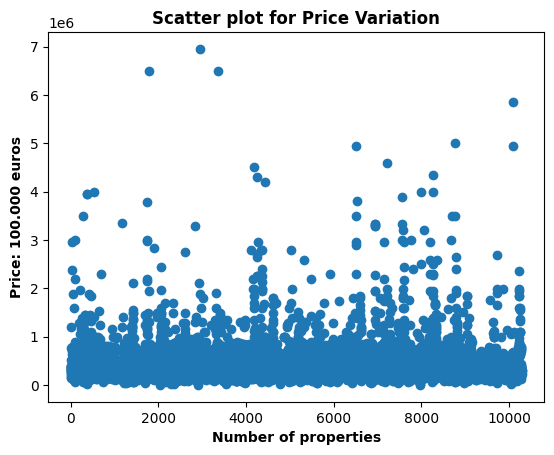

In [74]:
#Convert 'price' column to Pandas Series
price_series = pd.Series(immo_dataset['price'])

#Create the scatter plot
plt.scatter(range(len(price_series)), price_series)

#Set plot title and labels
plt.title('Scatter plot for Price Variation', fontweight='bold')
plt.xlabel('Number of properties', fontweight='bold')
plt.ylabel('Price: 100.000 euros', fontweight='bold')
plt.savefig("outliers_plot.jpg")

#Display the scatter plot
plt.show()

Drop outliers.

In [75]:
immo_dataset.drop(immo_dataset[(immo_dataset['price'] >= 2000000) & (immo_dataset['postal_code'] == '9400')].index, inplace=True)
property_counts = immo_dataset['postal_code'].value_counts()
immo_dataset = immo_dataset[immo_dataset['postal_code'].isin(property_counts[property_counts >= 10].index)]
immo_dataset.drop(immo_dataset[(immo_dataset['habitable_surface'] <=20)].index, inplace=True)


Which variables would you delete and why ?


 'contruction_year',  'living_area', 'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 'plot_land_surface', 'number_of_facades', 'building_state'

We deleted the above variables beacause they had a significant percentage of missing values.

'subtype_property',type_of_sale. 

We deleted the above variables beacause they had no significant influence on the price of properties.

'locality',

we deleted this variable because it wasn't useful to our analysis, we used postal code instead.

Represent the number of properties according to their surface using a histogram.


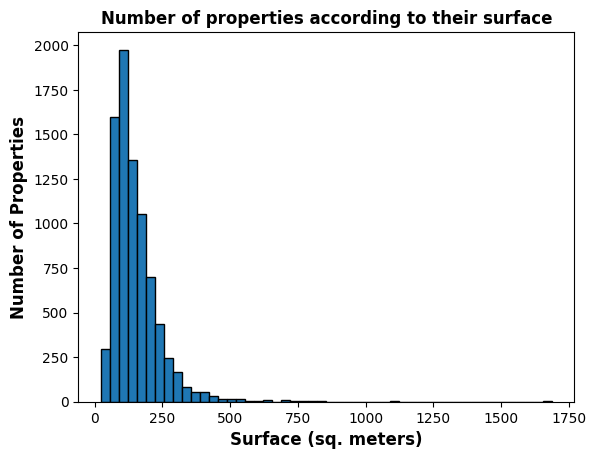

In [76]:
# Extract the 'habitable_surface' data
surface = immo_dataset['habitable_surface']

# Create the histogram
plt.hist(surface, bins=50, edgecolor='black')

# Label the axes and add a title
plt.xlabel('Surface (sq. meters)',fontsize=12, fontweight='bold')
plt.ylabel('Number of Properties',fontsize=12, fontweight='bold')
plt.title('Number of properties according to their surface', fontweight='bold')
plt.savefig("histogram_properties.jpg")

# Display the histogram
plt.show()



In your opinion, which 5 variables are the most important and why?


The variables with the most influence on property price are:

Habitable surface: the biggest the surface the biggest the price.

Number of rooms : construction cost increases as the number of room increases.

Presence of swimming pool: it is a luxury.

Region: Brussels : great population density -> higher demand over supply

Presence of terrace: convenience, being able to sit and drink your coffee.

Calculate price per square meter column.

In [77]:
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)

Calulate mean and median for the most expensive municipalities in Belgium.

In [82]:
# Group by postal code and calculate the average price, median price, and price per square meter
country_mean_median = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median')    
)

# Sort by postal code (index) in ascending order
sorted_postal_codes = country_mean_median.sort_index()

# Sort the postal codes (municipalities) based on the average price in descending order
most_expensive_municipalities = country_mean_median.sort_values(by='average_price', ascending=False).head(10)

# Print the most expensive regions and their corresponding statistics
print("Most Expensive Municipalities in Belgium:")
print(most_expensive_municipalities)

Most Expensive Municipalities in Belgium:
             average_price  median_price
postal_code                             
8300          1.385633e+06      975000.0
1640          1.235385e+06      995000.0
1050          1.016675e+06      714500.0
1380          9.031683e+05      597000.0
1950          8.244333e+05      657500.0
8301          7.989091e+05      572000.0
1180          7.461991e+05      550000.0
2950          7.125950e+05      364000.0
2820          7.030000e+05      725000.0
1150          6.912954e+05      605000.0


Bar plot for mean and median for the most expensive municipalities in Belgium.

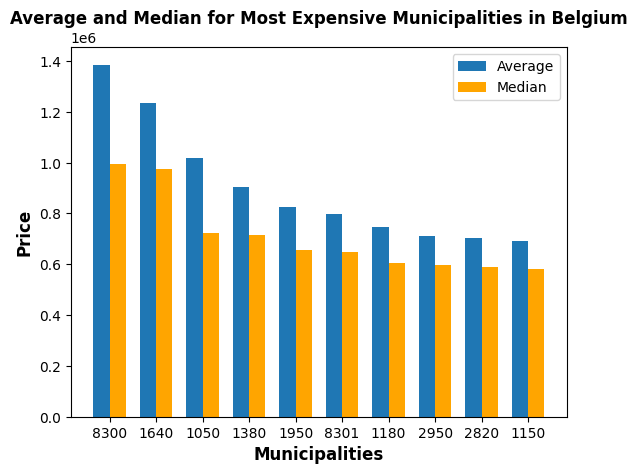

In [84]:
# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = country_mean_median.nlargest(10, 'average_price')
most_expensive_postal_codes_median = country_mean_median.nlargest(10, 'median_price')

# Set bar plot
labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Average')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontsize=12, fontweight='bold')
ax.set_ylabel('Price', fontsize=12, fontweight='bold')
ax.set_title('Average and Median for Most Expensive Municipalities in Belgium', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Bar plot for price per sqare meter for the most expensive municipalities in Belgium.

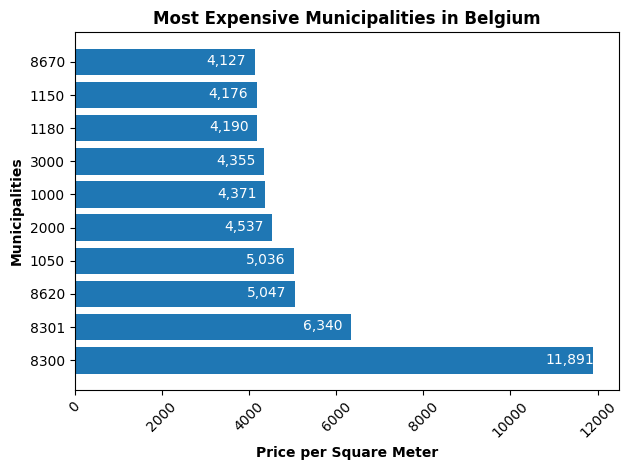

In [87]:
# Group by postal code and calculate the price per square meter
country_mean_median_psqm = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the most expensive postal codes
most_expensive_postal_codes = country_mean_median_psqm.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = most_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Most Expensive Municipalities in Belgium', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-1100, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)


Filter the dataset for Wallonia.

In [88]:
wallonia_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

Bar plot for mean and median for the most expensive municilapities in Wallonia.

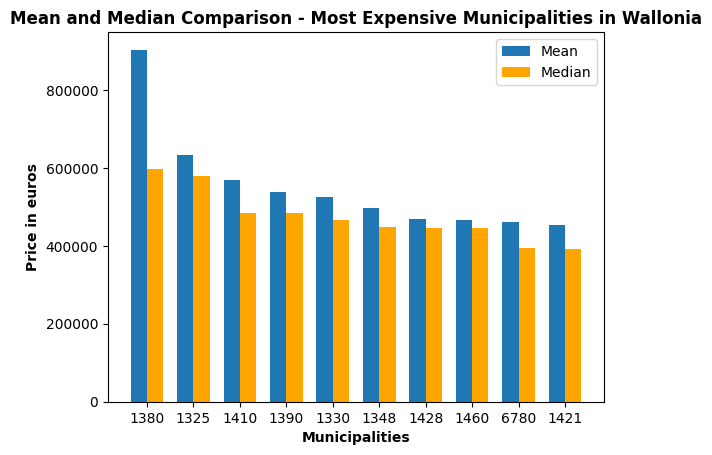

In [90]:
# Group by postal code and calculate the average price andmedian price
wallonia_mean_median = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)
# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = wallonia_mean_median.nlargest(10, 'average_price')
most_expensive_postal_codes_median = wallonia_mean_median.nlargest(10, 'median_price')

# Set bar plot
labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price in euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Wallonia', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


Bar plot for price per square meter for most expensive municipalities in Wallonia.

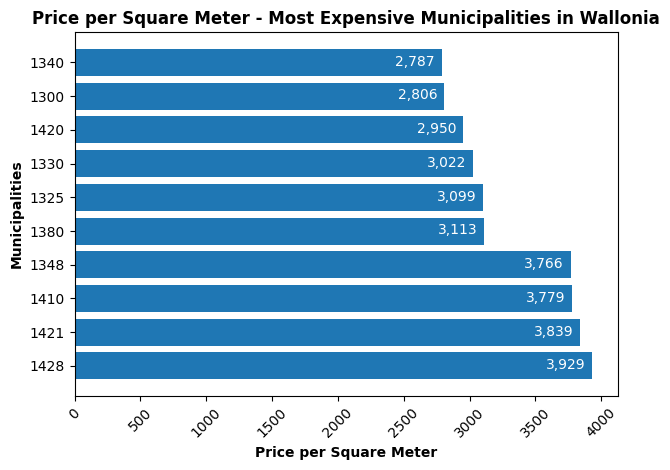

In [93]:
# Group by postal code and calculate the average price, median price, and price per square meter
wallonia_mean_median_psqm = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the least expensive postal codes
most_expensive_postal_codes = wallonia_mean_median_psqm.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = most_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Wallonia', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-350, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)


Filter the dataset for Flanders.

In [94]:
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

Bar plot for mean and median for most expensive municipalities in Flanders.

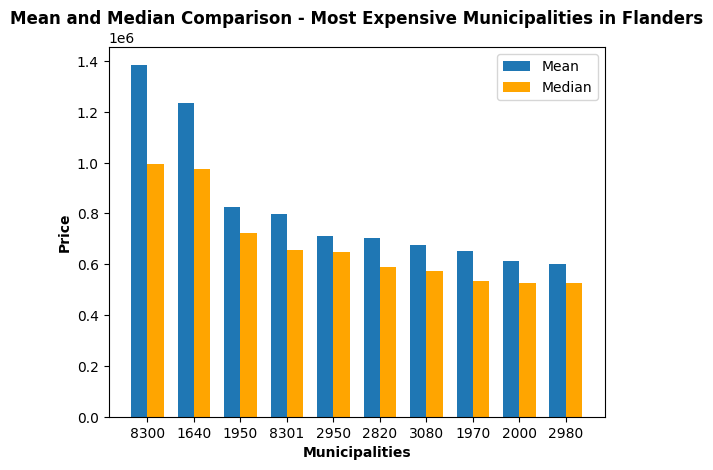

In [96]:
# Group by postal code and calculate the average price, median price
flanders_mean_median = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)
# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = flanders_mean_median.nlargest(10, 'average_price')
most_expensive_postal_codes_median = flanders_mean_median.nlargest(10, 'median_price')

# Set bar plot
labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Flanders', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Bar plot for price per square meter for most expensive municipalities in Flanders.

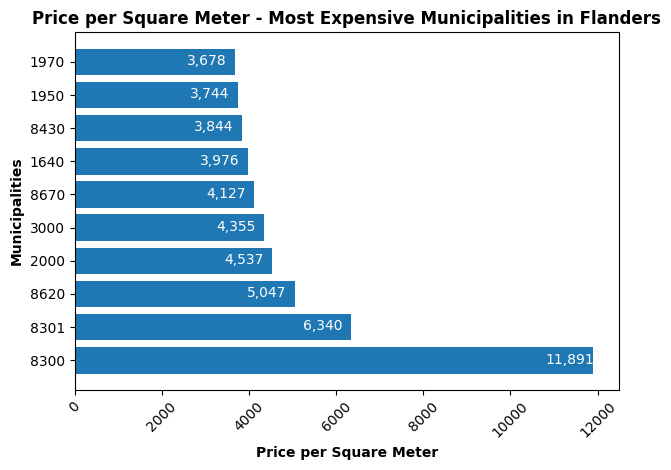

In [98]:
# Group by postal code and calculate the price per square meter
flanders_mean_median_psqm = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the least expensive postal codes
most_expensive_postal_codes = flanders_mean_median_psqm.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = most_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Flanders', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-1100, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)


Calculate mean and median for least expensive municipalities in Belgium.

In [108]:
# Sort the postal codes by average price in descending order
least_expensive_municipalities = country_mean_median.sort_values(by='average_price', ascending=True).head(10)

# Print the most expensive municipalities and their corresponding statistics
print("Least Expensive Municilapities in Belgium:")
print(least_expensive_municipalities)


Least Expensive Municilapities in Belgium:
             average_price  median_price
postal_code                             
4820         101133.333333      105000.0
6001         128038.461538      115000.0
7110         154119.047619      155000.0
7340         154500.000000      159000.0
7700         163490.909091      165000.0
6060         164994.388889      136000.0
6180         168591.000000      130000.0
6040         171350.000000      159000.0
7100         174790.708333      157000.0
4102         176388.888889      173250.0


Bar plot for mean and median for least expensive municipalities in Belgium.

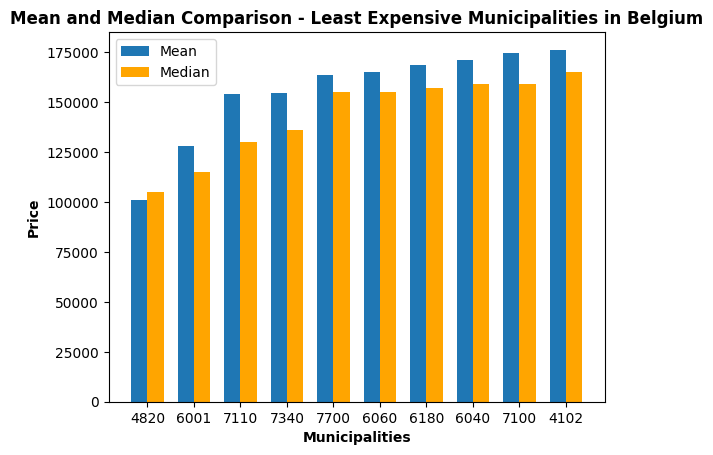

In [110]:
# Sort the postal codes by average price and median in ascending order
least_expensive_postal_codes_average = country_mean_median.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = country_mean_median.nsmallest(10, 'median_price')

# Set bar plot
labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Least Expensive Municipalities in Belgium', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Bar plot for price per square meter for least expensive municipalities in Belgium.

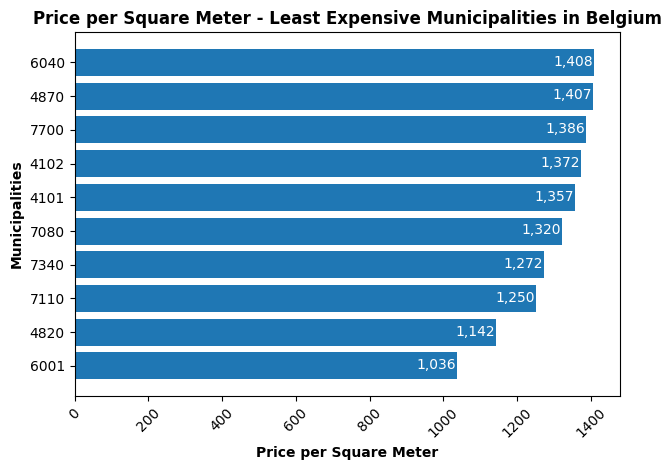

In [112]:
# Get the least expensive postal codes
least_expensive_postal_codes = country_mean_median_psqm.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = least_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Least Expensive Municipalities in Belgium', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-110, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)


Bar plot for mean and median for least expensive municipalities for Wallonia.

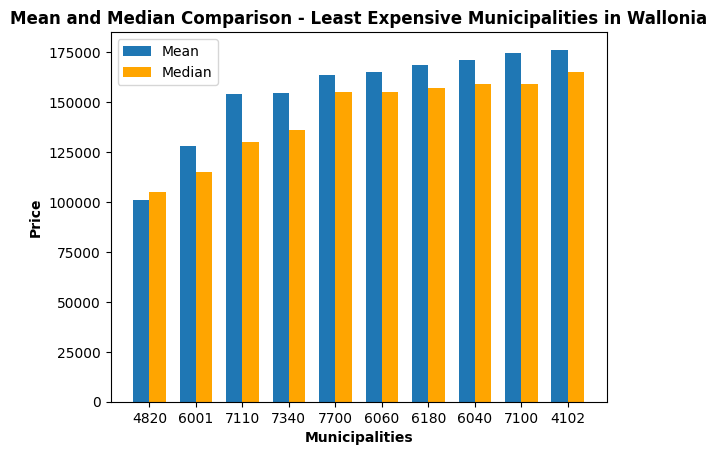

In [116]:
# Sort the postal codesby average and median price in ascending order
least_expensive_postal_codes_average = wallonia_mean_median.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = wallonia_mean_median.nsmallest(10, 'median_price')

# Set bar plot
labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean',)
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Least Expensive Municipalities in Wallonia', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Bar plot for price per square meter for least expensive municipalities for Wallonia.

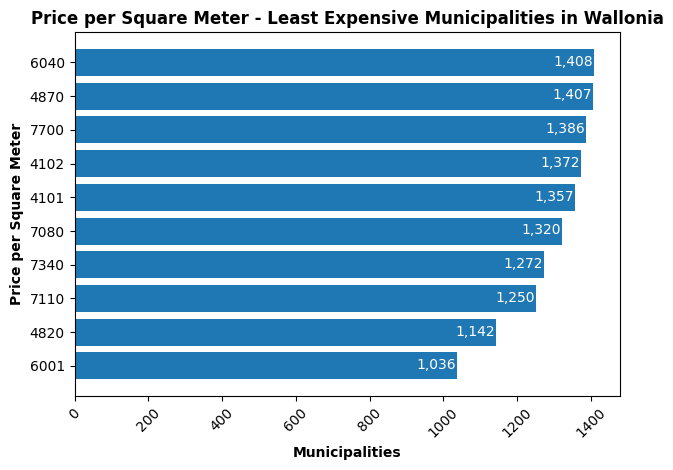

In [117]:
# Get the least expensive postal codes
least_expensive_postal_codes = wallonia_mean_median_psqm.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = least_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price per Square Meter', fontweight='bold')
ax.set_title('Price per Square Meter - Least Expensive Municipalities in Wallonia', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-110, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)


Bar plot for mean and median for least expensive municipalities for Flanders.

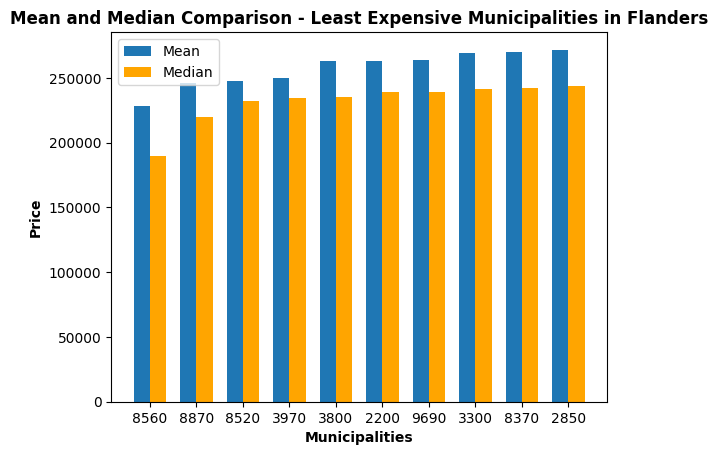

In [119]:
# Sort the postal codes by average  and median price in ascending order
least_expensive_postal_codes_average = flanders_mean_median.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = flanders_mean_median.nsmallest(10, 'median_price')

# Set bar plot
labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Least Expensive Municipalities in Flanders', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Bar plot for price per square meter for least expensive municipalities for Flanders.

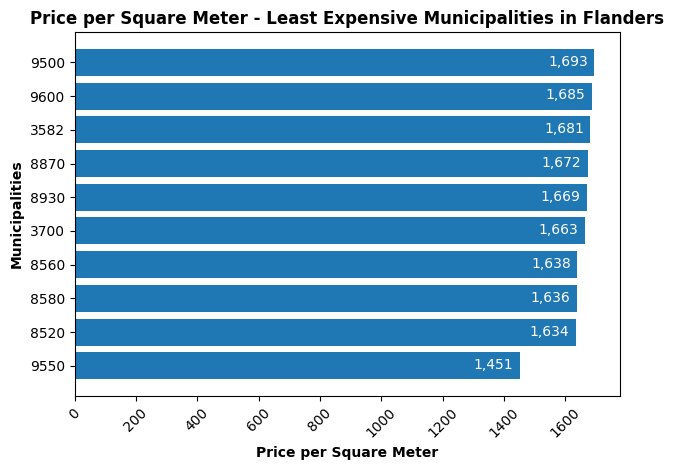

In [121]:
# Get the least expensive postal codes
least_expensive_postal_codes = flanders_mean_median_psqm.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = least_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Least Expensive Municipalities in Flanders', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-150, index-0.1), color='white')
plt.tight_layout()
plt.show()

Filter the dataset for Brussels.

In [122]:
brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

Bar plot for mean and median for least expensive municipalities in Brussels.

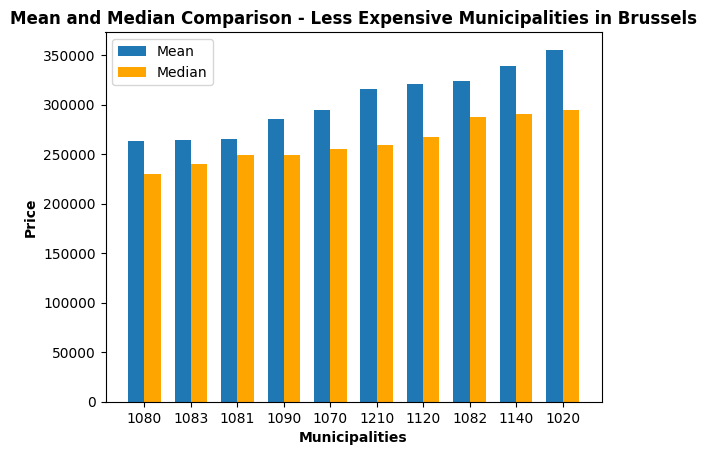

In [128]:
# Group by postal code and calculate the average price, median price
brussels_mean_median = brussels_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)
# Sort the postal codes by average and median price in ascending order
least_expensive_postal_codes_average = brussels_mean_median.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = brussels_mean_median.nsmallest(10, 'median_price')

# Set bar plot
labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Least Expensive Municipalities in Brussels', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Bar plot for price per square meter for least expensive municipalities in Brussels.

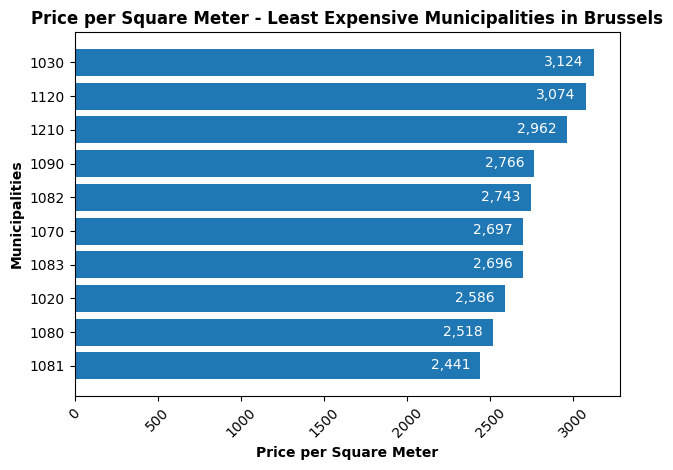

In [133]:
# Group by postal code and calculate the price per square meter
brussels_mean_median_psqm = brussels_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the least expensive postal codes
least_expensive_postal_codes = brussels_mean_median_psqm.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = least_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Least Expensive Municipalities in Brussels', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-300, index-0.1), color='white')
plt.tight_layout()
plt.show()

Bar plot for mean and median for most expensive municipalities in Brussels.

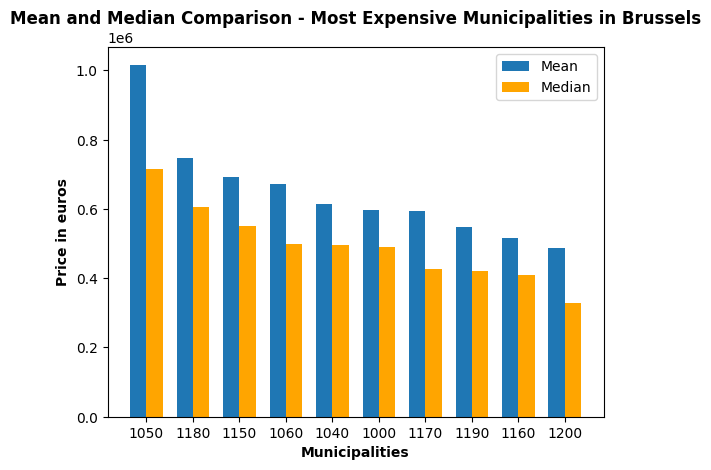

In [134]:
# Sort the postal codes by average and median price in ascending order
most_expensive_postal_codes_average = brussels_mean_median.nlargest(10, 'average_price')
most_expensive_postal_codes_median = brussels_mean_median.nlargest(10, 'median_price')

# Set bar plot
labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price in euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Brussels', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Bar plot for price per square meter for most expensive municipalities in Brussels.

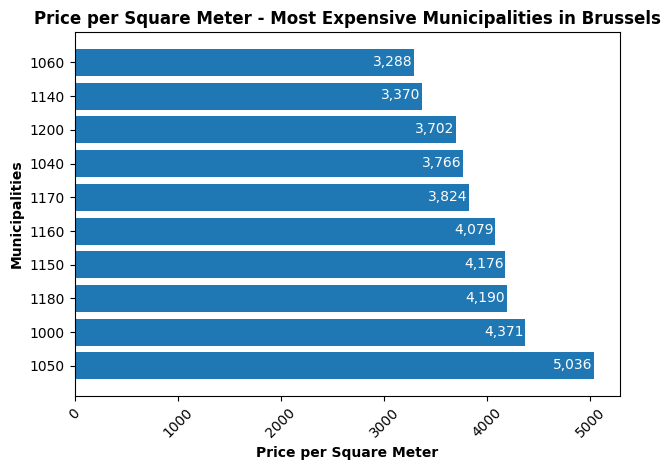

In [135]:
# Get the least expensive postal codes
most_expensive_postal_codes = brussels_mean_median_psqm.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values 
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']

# Set bar plot
labels = most_expensive_postal_codes.index
fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Brussels', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-400, index-0.1), color='white')
plt.tight_layout()
plt.show()